In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('ADANIPORTS.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Next_Month_Close'] = data['Close'].shift(-21)  # assuming 21 trading days in a month

data.dropna(inplace=True)

X = data[['Close']]
y = data['Next_Month_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Mean Squared Error: 6606.567430488833
R^2 Score: 0.8867794995709051


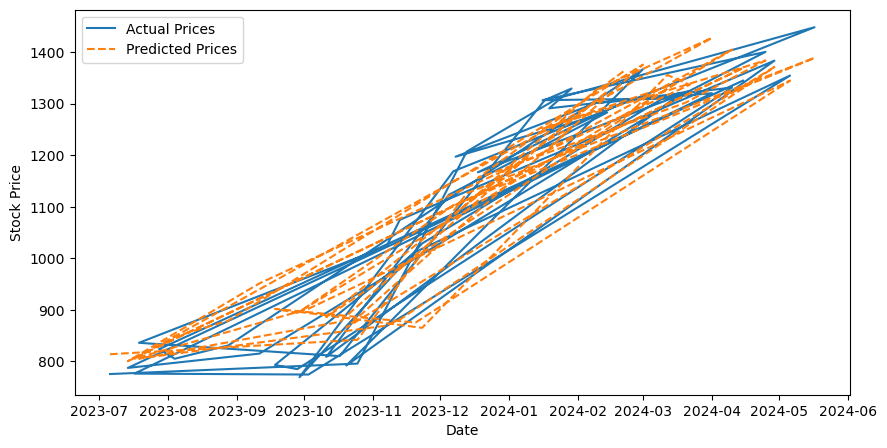

In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [7]:
# Predict the stock prices for the next month (21 trading days)
last_price = X.iloc[-1].values.reshape(-1, 1)
next_month_predictions = []

for _ in range(21):
    next_price = model.predict(last_price)[0]
    next_month_predictions.append(next_price)
    last_price = np.array([[next_price]])

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=21, freq='B')  # 'B' for business days
future_prices = pd.DataFrame(next_month_predictions, index=future_dates, columns=['Predicted_Close'])

print(future_prices)

            Predicted_Close
2024-05-23      1429.923436
2024-05-24      1479.869049
2024-05-27      1528.097903
2024-05-28      1574.669005
2024-05-29      1619.639337
2024-05-30      1663.063922
2024-05-31      1704.995891
2024-06-03      1745.486550
2024-06-04      1784.585439
2024-06-05      1822.340397
2024-06-06      1858.797620
2024-06-07      1894.001713
2024-06-10      1927.995749
2024-06-11      1960.821323
2024-06-12      1992.518596
2024-06-13      2023.126351
2024-06-14      2052.682038
2024-06-17      2081.221819
2024-06-18      2108.780614
2024-06-19      2135.392142
2024-06-20      2161.088962


C:\Users\raksh\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\raksh\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\raksh\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\raksh\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\raksh\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\raksh\anaconda3\anaconda\Lib\site-pa